In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from datetime import datetime, timedelta

from population import Population

%matplotlib inline

In [14]:
population_file_name = 'data/population.json'
population = Population.from_json(population_file_name)
population_random_file_name='cdata/population.json'
population_random=Population.from_json(population_random_file_name)
            

In [15]:
stats_random = dict([(person_id, {'group': (person_id, 'control'),
                               'received': 0,
                               'viewed': 0,
                               'completed': 0,
                               'trx': 0,
                               'spend': 0.00}) for person_id in population_random.people])

revenue_history_random = dict()

read_files=[]
for k in range(0,10):
    read_files.append('cdata%s/transcript.json' % k)
    for f in read_files:
        with open(f, 'r') as transcript_file:
            for line_number, line in enumerate(transcript_file):
                text = line.strip()
                if text != '':
                    record = json.loads(text)
                else:
                    continue

                if record['event'] == 'offer received':
                    stats_random[record['person']]['received'] += 1

                if record['event'] == 'offer viewed':
                    stats_random[record['person']]['viewed'] += 1

                if record['event'] == 'offer completed':
                    stats_random[record['person']]['completed'] += 1
                    t = record['time']
                    revenue_history_random.setdefault(t, list())
                    revenue_history_random[t].append(-record['value']['reward'])

                if record['event'] == 'transaction':
                    stats_random[record['person']]['trx'] += 1
                    stats_random[record['person']]['spend'] += record['value']['amount']
                    t = record['time']
                    revenue_history_random.setdefault(t, list())
                    revenue_history_random[t].append(record['value']['amount'])


In [16]:
min_t = min(revenue_history_random.keys())
cumulative_reward_random = [(min_t,0),]
for t, rev in sorted(revenue_history_random.iteritems()):
    np.random.shuffle(rev)
    for x in rev:
        cumulative_reward_random.append((t, cumulative_reward_random[-1][1] + x))


In [17]:
newarray_random=[[0,0]]
for entry in cumulative_reward_random:
    if entry[0]>newarray_random[len(newarray_random)-1][0]:
        newarray_random.append([entry[0], entry[1]])
    elif entry[1]>newarray_random[len(newarray_random)-1][1]:
        newarray_random[len(newarray_random)-1][1]=entry[1]
 

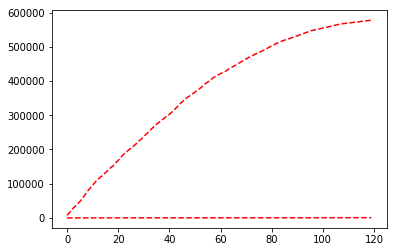

In [19]:
plt.plot(newarray_random,'r--')

In [ ]:
plt.plot(cumulative_reward_array)